# Problem Statement : UBER DATA ANALYSIS

## Import Required Library

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Dataset

In [99]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [100]:
df.shape # rows and columns in the data

(1156, 7)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [102]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### Data Preprocessing

In [103]:
df["PURPOSE"].fillna("Not",inplace=True)

C:\Users\baghe\AppData\Local\Temp\ipykernel_21824\3869245808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PURPOSE"].fillna("Not",inplace=True)


In [104]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [105]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors="coerce") ## it change the object datatype into datetime format
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors="coerce")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [107]:
from datetime import datetime

In [108]:
df["Start_Date"] = pd.DatetimeIndex(df["START_DATE"]).date
df["Start_Time"] = pd.DatetimeIndex(df["START_DATE"]).hour

In [109]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [110]:
df["day-night"] = pd.cut(df["Start_Time"],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])

In [111]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [112]:
df.isnull().sum()

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE         0
Start_Date    735
Start_Time    735
day-night     742
dtype: int64

In [113]:
df.dropna(inplace=True)

In [114]:
df.shape

(413, 10)

### Data Visualization

### In which category do people book the most uber rides
### For which purpose do people book the uber rides most

<Axes: xlabel='count', ylabel='PURPOSE'>

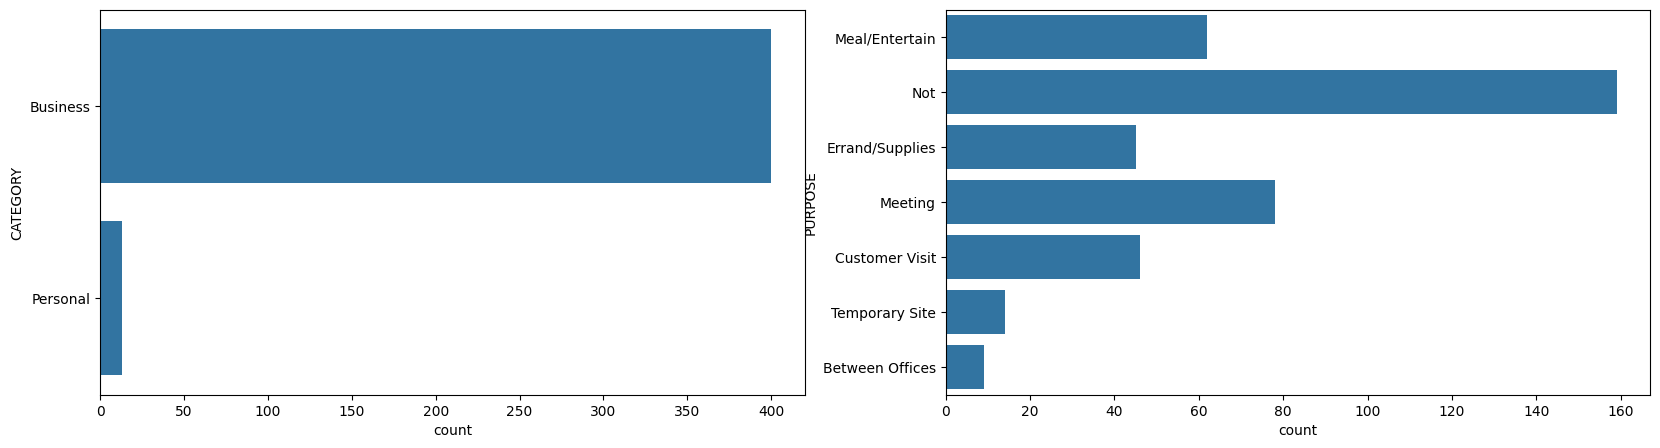

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df["CATEGORY"])
plt.subplot(1,2,2)
sns.countplot(df["PURPOSE"])

### At what time do people book cabs the most from the uber

<Axes: xlabel='count', ylabel='day-night'>

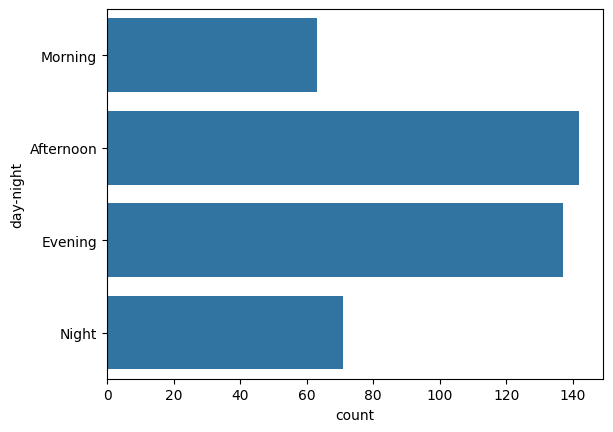

In [116]:
sns.countplot(df["day-night"])

### In which months do people book uber rides frequently

In [124]:
df["Month"] = pd.DatetimeIndex(df["Start_Date"]).month
month_label = {1:"Jan",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
df["Month"] = df["Month"].map(month_label)
mon = df["Month"].value_counts(sort=False)

In [125]:
df.sample()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,day-night,Month
621,2016-08-02 11:51:00,2016-08-02 12:15:00,Business,Arlington,Washington,4.9,Not,2016-08-02,11.0,Afternoon,Aug


[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Value count')]

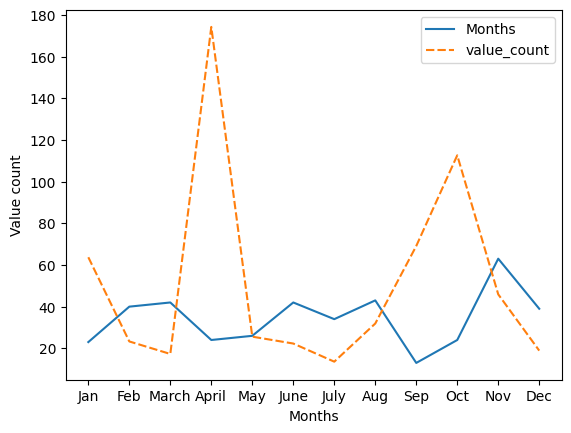

In [126]:
dataset = pd.DataFrame({"Months":mon.values,"value_count":df.groupby("Month",sort=False)["MILES"].max()})
p = sns.lineplot(data=dataset)
p.set(xlabel="Months",ylabel="Value count")

### On which day of the week do people book the uber rides most

In [131]:
df["Day"] = df["START_DATE"].dt.weekday
day_label = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
df["Day"] = df["Day"].map(day_label)

In [132]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Start_Date,Start_Time,day-night,Month,week,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,4,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,5,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,5,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,1,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,2,Wed


Text(0, 0.5, 'Count')

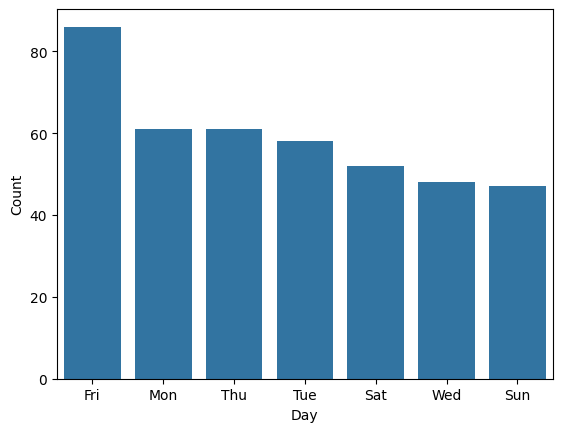

In [133]:
day_label = df["Day"].value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel("Day")
plt.ylabel("Count")

### How Many miles do people usually book a cab for through Uber

<Axes: ylabel='MILES'>

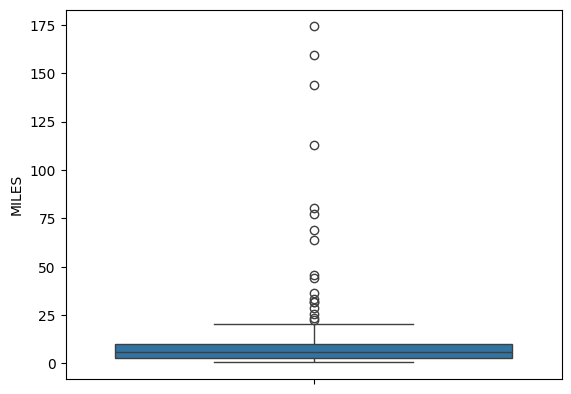

In [134]:
sns.boxplot(df["MILES"])

<Axes: ylabel='MILES'>

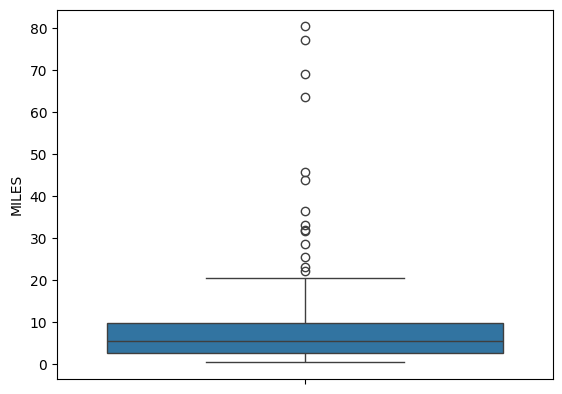

In [137]:
sns.boxplot(df[df["MILES"]<100]["MILES"])

<Axes: ylabel='MILES'>

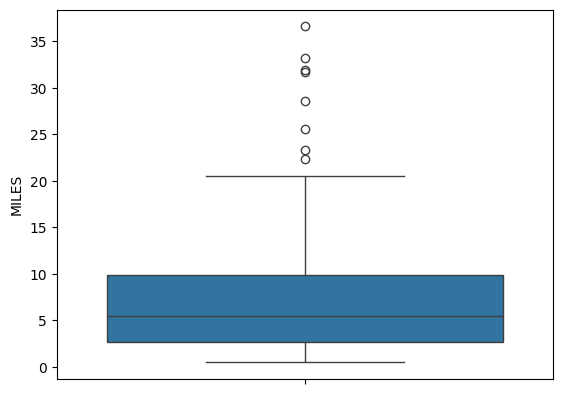

In [138]:
sns.boxplot(df[df["MILES"]<40]["MILES"])

C:\Users\baghe\AppData\Local\Temp\ipykernel_21824\2117430055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["MILES"]<40]["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

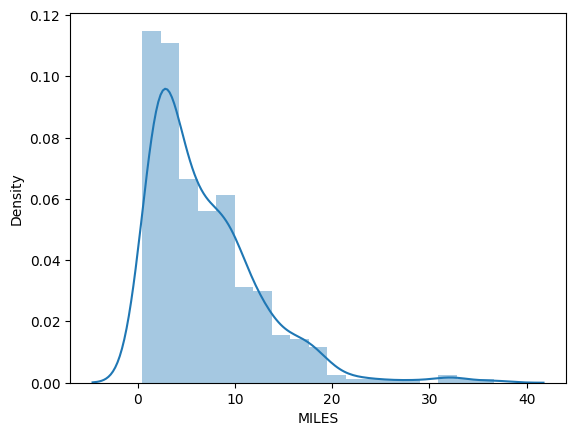

In [140]:
sns.distplot(df[df["MILES"]<40]["MILES"])